<a href="https://colab.research.google.com/github/jmquintana/data_science_sprint_2/blob/main/JoseQuintanaProyecto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Sprint Proyect 2**

#### Ingeniería de Features, Modelos Avanzados e Interpretación de Modelos (4 sprints)
***

### **Story Points**
<img src='https://s3.amazonaws.com/platform-resources.acamica.com/slides/Im%C3%A1genes+en+Toolboxes/DS+(4+Sprints)/ds_sprintproject2_a_actuallizado.png' >

### **Transformación de Datos**
***

##### **Carga del dataset**

In [135]:
# Importamos las librerías que vamos a necesitar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [136]:
# Le doy formato a los gráficos
sns.set_style("darkgrid")
plt.rc('font', size=10)
plt.rc('axes', titlesize=16)
plt.rc('figure', titlesize=16)
plt.rc('axes', labelsize=14) 
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

In [137]:
#Seteamos para que no utilice notacion cientifica
pd.options.display.float_format = '{:.4f}'.format
#Seteo para que el máximo de columnas que muestra al levantar una base sean 500
pd.set_option('display.max_columns',500)
#Estos códigos hacen que la visualización de la consola abarque toda la pantalla (sin los recortes a los costados). Tambien hacen que al mostrar dataframes podamos ver todas las columnas que tiene.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# Codigo para poder imprimir multiples outputs en una misma línea
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [138]:
# Monto mi Google Drive para cargar el DataSet
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
# Cargo el DataSet con Pandas como un DataFrame nombrado "df"
# Previamente debe descargarse del siguiente link: https://drive.google.com/uc?export=download&id=1Ugbsw5XbNRbglomSQO1qkAgMFB_3BzmB
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DS_Proyecto_01_Datos_Properati.csv")
# df = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")

In [140]:
print("Columnas:",df.shape[1])
print("Filas:",df.shape[0])

Columnas: 19
Filas: 146660


In [141]:
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.6059,-58.3849,Argentina,Capital Federal,San Cristobal,7.0000,7.0000,2.0000,140.0000,140.0000,153000.0000,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.6241,-58.4121,Argentina,Capital Federal,Boedo,2.0000,1.0000,2.0000,70.0000,58.0000,159000.0000,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.5936,-58.4275,Argentina,Capital Federal,Palermo,2.0000,1.0000,1.0000,45.0000,45.0000,125000.0000,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.5813,-58.4368,Argentina,Capital Federal,Palermo,2.0000,1.0000,1.0000,85.0000,50.0000,295000.0000,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.9142,-57.9382,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0000,1.0000,1.0000,50.0000,35.0000,40000.0000,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [142]:
# Elimino columnas que no necesitaré y renombro las columnas
df = df[['lat', 'lon', 'l2', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'property_type']]
df = df.rename({'l2':'zona', 'l3':'barrio', 'rooms':'ambientes', 'bedrooms':'dormitorios', 'bathrooms':'baños', 'surface_total':'sup_total', 'surface_covered':'sup_cubierta', 'price':'precio', 'property_type':'tipo'}, axis=1)
df.head()

,lat,lon,zona,barrio,ambientes,dormitorios,baños,sup_total,sup_cubierta,precio,tipo
0,-34.6059,-58.3849,Capital Federal,San Cristobal,7.0000,7.0000,2.0000,140.0000,140.0000,153000.0000,Departamento
1,-34.6241,-58.4121,Capital Federal,Boedo,2.0000,1.0000,2.0000,70.0000,58.0000,159000.0000,PH
2,-34.5936,-58.4275,Capital Federal,Palermo,2.0000,1.0000,1.0000,45.0000,45.0000,125000.0000,PH
3,-34.5813,-58.4368,Capital Federal,Palermo,2.0000,1.0000,1.0000,85.0000,50.0000,295000.0000,PH
4,-34.9142,-57.9382,Bs.As. G.B.A. Zona Sur,La Plata,2.0000,1.0000,1.0000,50.0000,35.0000,40000.0000,PH


In [143]:
# Agrupo las propiedades por `tipo` para ver su participación dentro de la muestra
df_group = df.groupby('tipo').count().precio / df.shape[0]
df_group.sort_values(ascending=False, inplace=True)
df_group = df_group.reset_index(name='rel')
# df_group['rel'] = pd.Series(["{0:.1f}%".format(val * 100) for val in df_group['rel']])
df_group

,tipo,rel
0,Departamento,0.7318
1,Casa,0.1467
2,PH,0.0975
3,Lote,0.0089
4,Oficina,0.0045
5,Otro,0.0026
6,Local comercial,0.0022
7,Casa de campo,0.0022
8,Depósito,0.0018
9,Cochera,0.0018


In [144]:
# Descarto las instancias del dataset cuyo ´tipo´ tenga una articipación menor al 1% del total (ya que no considero representativa)
# Me quedo con los tipos Departamento, Casa y PH
df = df[df.tipo.isin(['Departamento', 'Casa', 'PH'])]

A continuación realizamos algunas verificaciones extra: que no haya `sup_cubierta` > `sup_total`, que no haya instancias duplicadas.

In [145]:
# Verifico que la superfice cubierta no sea mayor que la total
# A continuación vamos a filtrar aquellas propiedades que posean 'surface_covered' > 'surface_total' ya que son  inconsistencias del dataset.
mascara = (df.sup_cubierta) > (df.sup_total)
print("La cantidad de instancias que tienen 'sup_cubierta' mayor que 'sup_total' es:", df[mascara].shape[0])

La cantidad de instancias que tienen 'sup_cubierta' mayor que 'sup_total' es: 1420


In [146]:
# Reasignamos esas instancias con el valor de `sup_total`
df.loc[mascara, 'sup_cubierta'] = df.loc[mascara, 'sup_total']

In [147]:
# Verificamos las instancias duplicadas
df.drop_duplicates(inplace=True)

In [148]:
df.shape

(99677, 11)

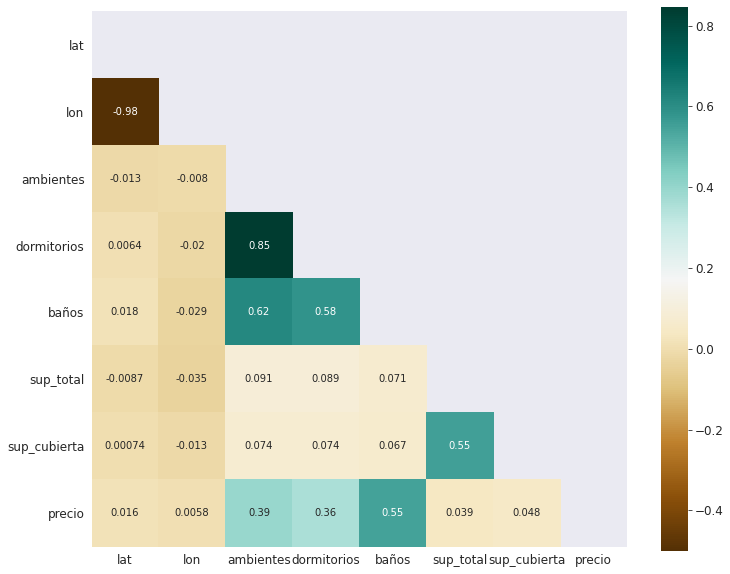

In [149]:
plt.figure(figsize=(12,10))
corr_matrix = df.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, vmin=-0.5, annot=True, square=True, mask=mask, cmap='BrBG')
plt.show()

##### **Elección de transformaciones**

##### 1. Encoding

Vamos a realizar el encoding de las variables categóricas: ***zona***, ***barrio*** y ***tipo*** para poder utilizar éstos atributos como input del modelo predictor. Las 3 variables son de tipo nominal por lo que aplicaría ***One Hot Enconding***. Sin embargo, la columna ***barrio*** presenta muchas instancias distintas, por lo que realizar un One Hot Encoding de ella generaría muchas columnas adicionales y encarecería el procesamiento de los datos.

##### 2. Análisis de Valores Faltantes

In [150]:
# Cantidad de valores faltantes por columna del dataset
faltantes = pd.DataFrame(df.isnull().sum(), columns=['faltantes'])
faltantes

,faltantes
lat,6709
lon,6737
zona,0
barrio,0
ambientes,0
dormitorios,0
baños,3717
sup_total,15673
sup_cubierta,15876
precio,0


###### 2.1. Faltantes de variable `baños`

In [151]:
# Análisis faltantes en variable 'baños'
df_baños_faltantes = df.baños.isnull().groupby([df['tipo']]).sum().astype(int).reset_index(name='missings')
df_baños_faltantes['total'] = df.precio.groupby(df['tipo']).count().values
df_baños_faltantes['rel'] = df_baños_faltantes.missings / df_baños_faltantes.total
df_baños_faltantes.sort_values(by='rel', ascending=False, inplace=True)
# df_baños_faltantes.reset_index(drop=True, inplace=True)
df_baños_faltantes['%'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df_baños_faltantes['rel']])
df_baños_faltantes

,tipo,missings,total,rel,%
0,Casa,1216,18459,0.0659,6.59%
1,Departamento,2328,71502,0.0326,3.26%
2,PH,173,9716,0.0178,1.78%


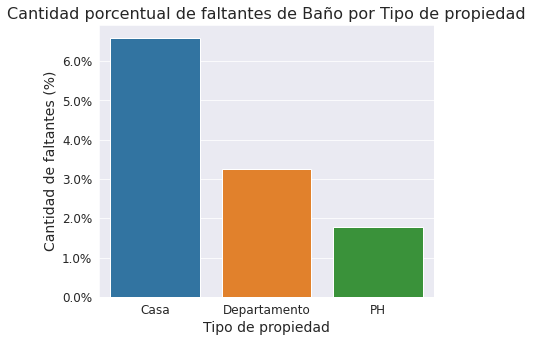

In [152]:
# Análisis faltantes en variable 'baños'
faltantes_baño = df[df.baños.isna()]
tipos = faltantes_baño.tipo.value_counts()
plt.figure(figsize=(6,5))
plt.title('Cantidad porcentual de faltantes de Baño por Tipo de propiedad')
ax = sns.barplot(data=df_baños_faltantes, x='tipo', y='rel')
plt.ylabel('Cantidad de faltantes (%)')
plt.xlabel('Tipo de propiedad')
plt.xticks(rotation=0)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
plt.show()

Para solucionar el tema de los valores faltantes de la variable `baños` podría imputarlos con el valor de la moda para cada `tipo` de propiedad.

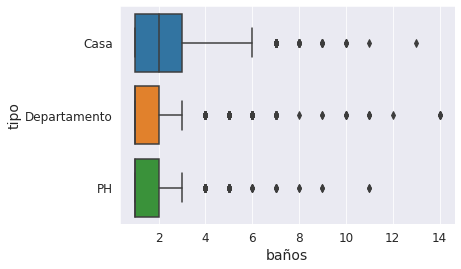

In [153]:
sns.boxplot(data=df, y='tipo', x='baños', order=df_baños_faltantes.tipo)
plt.show()

In [154]:
# La moda de la variable `baños` por cada tipo de propiedad
moda_baños_por_tipo = df.groupby(['tipo']).agg(lambda x:x.value_counts().index[0]).baños.reset_index(name='moda_baños')
moda_baños_por_tipo

,tipo,moda_baños
0,Casa,2.0000
1,Departamento,1.0000
2,PH,1.0000


###### 2.2. Faltantes de variable `sup_total` y `sup_cubierta`

In [155]:
# Separo los datos que tienen missings de superficie (total o cubierta)
mask = np.logical_or(df.sup_cubierta.isna(), df.sup_total.isna())
faltantes_sup = df[mask]

def sup_faltante(row):
  if np.logical_and(pd.isna(row.sup_total), pd.isna(row.sup_cubierta)):
    return 'ambas'
  elif np.logical_and(pd.isna(row.sup_total), ~pd.isna(row.sup_cubierta)):
    return 'total'
  elif np.logical_and(~pd.isna(row.sup_total), pd.isna(row.sup_cubierta)):
    return 'cubierta'
  else:
    return 'ninguna'

faltantes_sup['falta sup'] = faltantes_sup.apply(sup_faltante, axis=1)
faltantes_sup.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,lat,lon,zona,barrio,ambientes,dormitorios,baños,sup_total,sup_cubierta,precio,tipo,falta sup
722,-34.5776,-58.4651,Capital Federal,Colegiales,2.0000,1.0000,1.0000,35.0000,nan,89000.0000,Departamento,cubierta
723,nan,nan,Bs.As. G.B.A. Zona Oeste,La Matanza,2.0000,1.0000,1.0000,nan,nan,75000.0000,Departamento,ambas
890,nan,nan,Bs.As. G.B.A. Zona Oeste,La Matanza,3.0000,2.0000,1.0000,nan,nan,120000.0000,Departamento,ambas
891,nan,nan,Bs.As. G.B.A. Zona Oeste,La Matanza,3.0000,2.0000,1.0000,nan,nan,95000.0000,Departamento,ambas
913,-34.5988,-58.3640,Capital Federal,Puerto Madero,3.0000,2.0000,3.0000,165.0000,nan,690000.0000,Departamento,cubierta


In [156]:
# Vemos las instancias en las que faltan datos de superficie cubierta y/o de superficie total
faltantes_sup.groupby('falta sup').count().precio.reset_index(name='missings')

,falta sup,missings
0,ambas,15217
1,cubierta,659
2,total,456


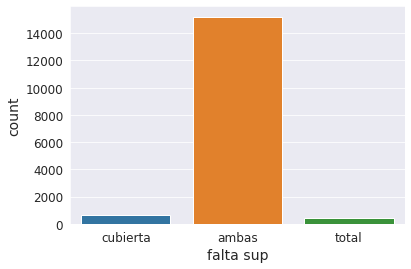

In [157]:
sns.countplot(data=faltantes_sup, x='falta sup')
plt.show()

Para los casos en que sólo falta una de las superficies, imputaría el valor de la faltante con el valor de la otra.
Para el caso en que faltan ambas superficies las imputaría calculando el precio por metro cuadraado promedio de cada barrio y luego calculo la superficie total dividiendo el `precio` por el `precio_m2` calculado por `barrio`.

###### 2.3. Faltantes de variables `lat` y `lon`

In [158]:
# Separo los datos que tienen missings de superficie (total o cubierta)
mask = np.logical_or(df.lat.isna(), df.lon.isna())
faltantes_coord = df[mask]

def coord_faltante(row):
  if np.logical_and(pd.isna(row.lat), pd.isna(row.lon)):
    return 'ambas'
  elif np.logical_and(pd.isna(row.lat), ~pd.isna(row.lon)):
    return 'lat'
  elif np.logical_and(~pd.isna(row.lat), pd.isna(row.lon)):
    return 'lon'
  else:
    return 'ninguna'

faltantes_coord['falta coordenada'] = faltantes_coord.apply(coord_faltante, axis=1)
faltantes_coord.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,lat,lon,zona,barrio,ambientes,dormitorios,baños,sup_total,sup_cubierta,precio,tipo,falta coordenada
17,nan,nan,Bs.As. G.B.A. Zona Norte,Tigre,2.0000,1.0000,1.0000,53.0000,42.0000,145000.0000,Departamento,ambas
26,nan,nan,Bs.As. G.B.A. Zona Oeste,Morón,2.0000,1.0000,1.0000,45.0000,45.0000,110000.0000,Departamento,ambas
35,nan,nan,Capital Federal,Palermo,2.0000,1.0000,2.0000,81.0000,76.0000,410000.0000,Departamento,ambas
36,nan,nan,Capital Federal,Palermo,2.0000,1.0000,1.0000,42.0000,38.0000,169000.0000,Departamento,ambas
46,nan,nan,Capital Federal,Palermo,2.0000,1.0000,1.0000,52.0000,46.0000,159500.0000,Departamento,ambas


In [159]:
faltantes_coord.groupby('falta coordenada').count().precio.reset_index(name='missings')

,falta coordenada,missings
0,ambas,6709
1,lon,28


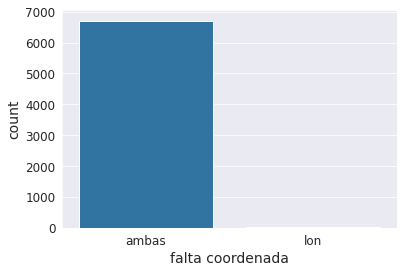

In [160]:
sns.countplot(data=faltantes_coord, x='falta coordenada')
plt.show()

En este caso completaría las coordenadas `lat` y `lon` de modo de imputarles el promedio de los valores correspondientes a los `barrios` a los cuales pertenecen las instancias.

In [161]:
df_con_coord = df[~mask]
barrios = df_con_coord.groupby(by='barrio').mean()[['lat', 'lon']].reset_index()
barrios

,barrio,lat,lon
0,Abasto,-34.6048,-58.4138
1,Agronomía,-34.5940,-58.4897
2,Almagro,-34.6069,-58.4216
3,Almirante Brown,-34.8131,-58.3872
4,Avellaneda,-34.6826,-58.3460
...,...,...,...
84,Villa Riachuelo,-34.6901,-58.4729
85,Villa Santa Rita,-34.6156,-58.4819
86,Villa Soldati,-34.6616,-58.4431
87,Villa Urquiza,-34.5738,-58.4850


##### 3. Detección y Eliminación de Outliers

##### **Implementación de transformaciones**

##### 1. Missings

In [162]:
# Creamos un diccionario para imputar los missings
dict_moda_baños_por_tipo = moda_baños_por_tipo.set_index('tipo').transpose().to_dict('records')[0]
print(dict_moda_baños_por_tipo)

{'Casa': 2.0, 'Departamento': 1.0, 'PH': 1.0}


In [163]:
# Imputando missings en `baños`
df.baños = df.baños.fillna(df.tipo.map(dict_moda_baños_por_tipo))
df

,lat,lon,zona,barrio,ambientes,dormitorios,baños,sup_total,sup_cubierta,precio,tipo
0,-34.6059,-58.3849,Capital Federal,San Cristobal,7.0000,7.0000,2.0000,140.0000,140.0000,153000.0000,Departamento
1,-34.6241,-58.4121,Capital Federal,Boedo,2.0000,1.0000,2.0000,70.0000,58.0000,159000.0000,PH
2,-34.5936,-58.4275,Capital Federal,Palermo,2.0000,1.0000,1.0000,45.0000,45.0000,125000.0000,PH
3,-34.5813,-58.4368,Capital Federal,Palermo,2.0000,1.0000,1.0000,85.0000,50.0000,295000.0000,PH
4,-34.9142,-57.9382,Bs.As. G.B.A. Zona Sur,La Plata,2.0000,1.0000,1.0000,50.0000,35.0000,40000.0000,PH
...,...,...,...,...,...,...,...,...,...,...,...
146644,-34.4451,-58.6212,Bs.As. G.B.A. Zona Norte,Tigre,3.0000,2.0000,2.0000,97.0000,80.0000,260000.0000,Departamento
146654,-34.6024,-58.5911,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,3.0000,2.0000,2.0000,161.0000,80.0000,200000.0000,Departamento
146657,-34.4446,-58.9816,Bs.As. G.B.A. Zona Norte,Pilar,1.0000,1.0000,1.0000,50.0000,35.0000,73000.0000,Departamento
146658,-34.4448,-58.9818,Bs.As. G.B.A. Zona Norte,Pilar,2.0000,1.0000,1.0000,38.0000,38.0000,68000.0000,Departamento


In [164]:
# Verificamos que no haya más missings en `baños`
df.isna().sum()

lat              6709
lon              6737
zona                0
barrio              0
ambientes           0
dormitorios         0
baños               0
sup_total       15673
sup_cubierta    15876
precio              0
tipo                0
dtype: int64

In [165]:
# Imputando missings en `lat` y `lon`
dict_media_lat_por_barrio = barrios[['barrio','lat']].set_index('barrio').transpose().to_dict('records')[0]
dict_media_lon_por_barrio = barrios[['barrio','lon']].set_index('barrio').transpose().to_dict('records')[0]
df.lat = df.lat.fillna(df.barrio.map(dict_media_lat_por_barrio))
df.lon = df.lon.fillna(df.barrio.map(dict_media_lon_por_barrio))
df.isna().sum()

lat                 0
lon                 0
zona                0
barrio              0
ambientes           0
dormitorios         0
baños               0
sup_total       15673
sup_cubierta    15876
precio              0
tipo                0
dtype: int64

In [166]:
# Agregamos una columna auxiliar al dataframe para identificar facilmente si falta
# una superficie o las dos, para facilitar la imputación de missings de superficie.
df['falta_sup'] = df.apply(sup_faltante, axis=1)
df.head()

,lat,lon,zona,barrio,ambientes,dormitorios,baños,sup_total,sup_cubierta,precio,tipo,falta_sup
0,-34.6059,-58.3849,Capital Federal,San Cristobal,7.0000,7.0000,2.0000,140.0000,140.0000,153000.0000,Departamento,ninguna
1,-34.6241,-58.4121,Capital Federal,Boedo,2.0000,1.0000,2.0000,70.0000,58.0000,159000.0000,PH,ninguna
2,-34.5936,-58.4275,Capital Federal,Palermo,2.0000,1.0000,1.0000,45.0000,45.0000,125000.0000,PH,ninguna
3,-34.5813,-58.4368,Capital Federal,Palermo,2.0000,1.0000,1.0000,85.0000,50.0000,295000.0000,PH,ninguna
4,-34.9142,-57.9382,Bs.As. G.B.A. Zona Sur,La Plata,2.0000,1.0000,1.0000,50.0000,35.0000,40000.0000,PH,ninguna


In [167]:
df.falta_sup.unique()

array(['ninguna', 'cubierta', 'ambas', 'total'], dtype=object)

In [168]:
# Imputamos los missings de `sup_total` con los valores de `sup_cubierta`
df.loc[df[df.falta_sup == 'total'].index, 'sup_total'] = df[df.falta_sup == 'total'].sup_cubierta

In [169]:
# Imputamos los missings de `sup_cubierta` con los valores de `sup_total`
df.loc[df[df.falta_sup == 'cubierta'].index, 'sup_cubierta'] = df[df.falta_sup == 'cubierta'].sup_total

In [170]:
# Verificamos que ahora tenemos misma cantidad de missings de `lat` y `lon`
df.isna().sum()

lat                 0
lon                 0
zona                0
barrio              0
ambientes           0
dormitorios         0
baños               0
sup_total       15217
sup_cubierta    15217
precio              0
tipo                0
falta_sup           0
dtype: int64

In [171]:
# Creamos una columna calculada con el precio por metro cuadrado
df['precio_m2'] = df.precio / df.sup_total
# Y luego creamos un diccionario con el precio por metro cuadrado por barrio
dict_precio_m2_por_barrio = df.groupby('barrio').mean()['precio_m2'].to_dict()

In [172]:
# Finalmente asigno el precio por metro cuadrado de cada barrio a cada fila que contiene faltantes
df.precio_m2 = df.precio_m2.fillna(df.barrio.map(dict_precio_m2_por_barrio))
# E imputo los valores faltantes de superficie con el cálculo de precio dividido el precio por metro cuadrado.
df.sup_total = df.sup_total.fillna(df.precio / df.precio_m2)
# Finalmente imputo la superficie cubierta con el valor de superficie total.
df.sup_cubierta = df.sup_cubierta.fillna(df.sup_total)

In [173]:
# Verifico que no tengo más missings.
df.isna().sum()

lat             0
lon             0
zona            0
barrio          0
ambientes       0
dormitorios     0
baños           0
sup_total       0
sup_cubierta    0
precio          0
tipo            0
falta_sup       0
precio_m2       0
dtype: int64

In [174]:
# Descarto las columnas auxiliares que no usaremos más.
df.drop(columns=['precio_m2', 'falta_sup'], inplace=True)

##### 2. Encoding

In [175]:
! pip install feature_engine

In [176]:
pip install --upgrade category_encoders

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.7/dist-packages (2.2.2)


In [177]:
# Importamos las librerias que son utiles para esto
import feature_engine
from feature_engine.imputation import AddMissingIndicator, CategoricalImputer, MeanMedianImputer, ArbitraryNumberImputer
from feature_engine.encoding import RareLabelEncoder
from feature_engine.outliers import Winsorizer
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, SmartCorrelatedSelection
import category_encoders as ce
from imblearn.pipeline import Pipeline

Posible opción para encoding: asignar un número a cada categoría

In [178]:
from sklearn.preprocessing import LabelEncoder
df2 = df.copy()
cols = ('zona', 'barrio', 'tipo')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df2[c].values)) 
    df2[c] = lbl.transform(list(df[c].values))

# shape        
print('Shape all_data: {}'.format(df2.shape))

Shape all_data: (99677, 11)


In [179]:
df2.head()

,lat,lon,zona,barrio,ambientes,dormitorios,baños,sup_total,sup_cubierta,precio,tipo
0,-34.6059,-58.3849,3,63,7.0000,7.0000,2.0000,140.0000,140.0000,153000.0000,1
1,-34.6241,-58.4121,3,11,2.0000,1.0000,2.0000,70.0000,58.0000,159000.0000,2
2,-34.5936,-58.4275,3,48,2.0000,1.0000,1.0000,45.0000,45.0000,125000.0000,2
3,-34.5813,-58.4368,3,48,2.0000,1.0000,1.0000,85.0000,50.0000,295000.0000,2
4,-34.9142,-57.9382,2,33,2.0000,1.0000,1.0000,50.0000,35.0000,40000.0000,2


Otra opción es realizar un Target Encoding

In [180]:
df3 = df.copy()
cols = ('zona', 'barrio', 'tipo')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl=ce.TargetEncoder(cols=c)
    df3[c] = lbl.fit_transform(df3[c], df['precio']) 

# shape        
print('Shape all_data: {}'.format(df3.shape))

Shape all_data: (99677, 11)


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



In [181]:
df3.head()

,lat,lon,zona,barrio,ambientes,dormitorios,baños,sup_total,sup_cubierta,precio,tipo
0,-34.6059,-58.3849,258249.1514,130576.7552,7.0000,7.0000,2.0000,140.0000,140.0000,153000.0000,231302.0609
1,-34.6241,-58.4121,258249.1514,148584.0431,2.0000,1.0000,2.0000,70.0000,58.0000,159000.0000,171013.6994
2,-34.5936,-58.4275,258249.1514,378600.3025,2.0000,1.0000,1.0000,45.0000,45.0000,125000.0000,171013.6994
3,-34.5813,-58.4368,258249.1514,378600.3025,2.0000,1.0000,1.0000,85.0000,50.0000,295000.0000,171013.6994
4,-34.9142,-57.9382,180894.9458,146513.0062,2.0000,1.0000,1.0000,50.0000,35.0000,40000.0000,171013.6994


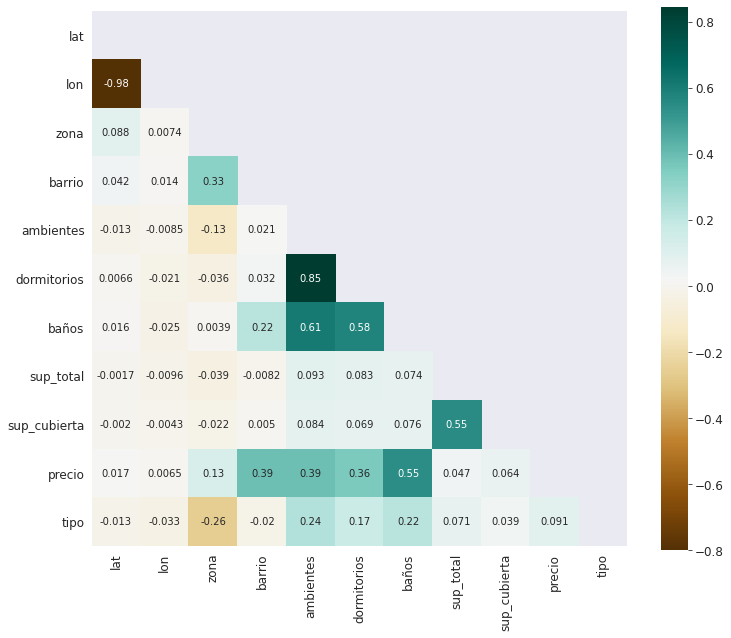

In [182]:
plt.figure(figsize=(12,10))
corr_matrix = df3.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, vmin=-0.8, annot=True, square=True, mask=mask, cmap='BrBG')
plt.show()

###### 1.1. One Hot Encoder

In [183]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [184]:
data = df[['barrio', 'tipo', 'sup_total', 'precio']]
column_trans = make_column_transformer(
    (OneHotEncoder(sparse=False),['barrio', 'tipo']),
    remainder='passthrough'
)
data = data.dropna()
X = data[['barrio', 'tipo', 'sup_total']]
y = data['precio']
print(X.shape)
print(y.shape)

(99677, 3)
(99677,)


In [185]:
X.head()

,barrio,tipo,sup_total
0,San Cristobal,Departamento,140.0000
1,Boedo,PH,70.0000
2,Palermo,PH,45.0000
3,Palermo,PH,85.0000
4,La Plata,PH,50.0000


In [186]:
column_trans.fit_transform(X)

array([[  0.,   0.,   0., ...,   1.,   0., 140.],
       [  0.,   0.,   0., ...,   0.,   1.,  70.],
       [  0.,   0.,   0., ...,   0.,   1.,  45.],
       ...,
       [  0.,   0.,   0., ...,   1.,   0.,  50.],
       [  0.,   0.,   0., ...,   1.,   0.,  38.],
       [  0.,   0.,   0., ...,   1.,   0.,  75.]])

##### 3. Ouliers

In [187]:
df3.describe()

,lat,lon,zona,barrio,ambientes,dormitorios,baños,sup_total,sup_cubierta,precio,tipo
count,99677.0000,99677.0000,99677.0000,99677.0000,99677.0000,99677.0000,99677.0000,99677.0000,99677.0000,99677.0000,99677.0000
mean,-34.6057,-58.4694,233359.3667,233359.4273,3.1197,1.9969,1.5952,196.0609,114.7656,233359.3667,233359.3667
std,0.5467,0.5660,37270.7943,113607.6211,1.4320,1.1490,0.8894,1570.9903,806.7505,287797.4140,26267.3257
min,-35.1508,-180.0000,154200.2163,95836.8802,1.0000,0.0000,1.0000,1.0000,1.0000,6000.0000,171013.6994
25%,-34.6347,-58.5226,237758.7481,152440.0076,2.0000,1.0000,1.0000,52.0000,47.9661,110000.0000,231302.0609
50%,-34.6014,-58.4511,258249.1514,203715.8454,3.0000,2.0000,1.0000,80.0000,70.0000,160000.0000,231302.0609
75%,-34.5688,-58.4049,258249.1514,294680.2353,4.0000,3.0000,2.0000,149.0000,117.0000,260000.0000,231302.0609
max,85.0511,-57.8058,258249.1514,935940.7996,35.0000,15.0000,14.0000,169000.0000,126062.0000,32434232.0000,274144.4573


La superficie mínima (tanto la total como la cubierta) siguen siendo de 1 $m^2$ (valor que no tiene mucho sentido), por lo que voy a filtrar el dataset para superficies mayores a 25 $m^2$.

In [188]:
df3 = df3[df3.sup_total > 25]
df3 = df3[df3.sup_cubierta > 25]
df3.shape

(98412, 11)

In [189]:
df3.describe()

,lat,lon,zona,barrio,ambientes,dormitorios,baños,sup_total,sup_cubierta,precio,tipo
count,98412.0000,98412.0000,98412.0000,98412.0000,98412.0000,98412.0000,98412.0000,98412.0000,98412.0000,98412.0000,98412.0000
mean,-34.6057,-58.4697,233212.9668,233497.5346,3.1423,2.0099,1.6020,198.1689,115.9781,235303.5378,233411.8778
std,0.5502,0.5695,37310.3665,113745.6890,1.4240,1.1480,0.8923,1580.9233,811.8474,289019.8933,26374.6838
min,-35.1508,-180.0000,154200.2163,95836.8802,1.0000,0.0000,1.0000,25.0023,25.0023,6000.0000,171013.6994
25%,-34.6352,-58.5234,237758.7481,152440.0076,2.0000,1.0000,1.0000,53.0000,48.0000,110000.0000,231302.0609
50%,-34.6014,-58.4516,258249.1514,203715.8454,3.0000,2.0000,1.0000,81.0000,71.0000,163000.0000,231302.0609
75%,-34.5684,-58.4052,258249.1514,294680.2353,4.0000,3.0000,2.0000,150.0000,118.0000,260228.2500,231302.0609
max,85.0511,-57.8058,258249.1514,935940.7996,35.0000,15.0000,14.0000,169000.0000,126062.0000,32434232.0000,274144.4573


In [190]:
# Vamos a eliminar los outliers con el método del rango intercuartílico.
df_out = df3.copy()
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
      
    print("El IQR de la columna %s es: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data

    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]

columns_to_filter = ['sup_total', 'sup_cubierta', 'precio']

for i in columns_to_filter:
    removeOutliers(df_out, i)
    # Assigning filtered data back to our orginal variable
    df_out = filtered_data
print("Shape of data after outlier removal is: ", df_out.shape)

El IQR de la columna sup_total es: 97.0
El IQR de la columna sup_cubierta es: 54.0
El IQR de la columna precio es: 125000.0
Shape of data after outlier removal is:  (78429, 11)


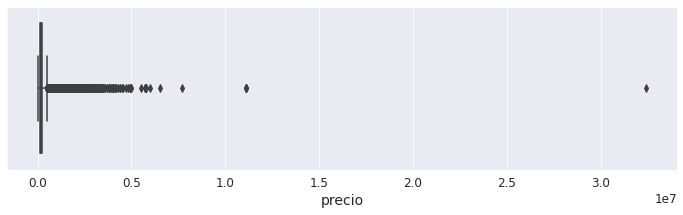

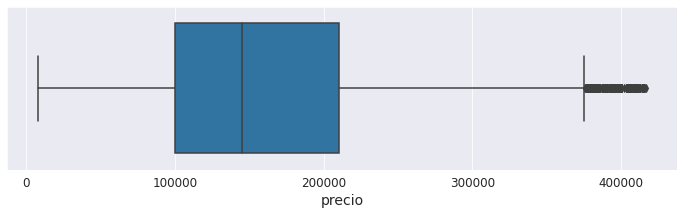

In [191]:
plt.figure(figsize=(12,3))
sns.boxplot(data=df3, x='precio')
plt.show()
plt.figure(figsize=(12,3))
sns.boxplot(data=df_out, x='precio')
plt.show()

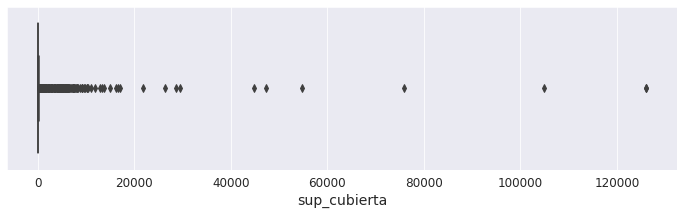

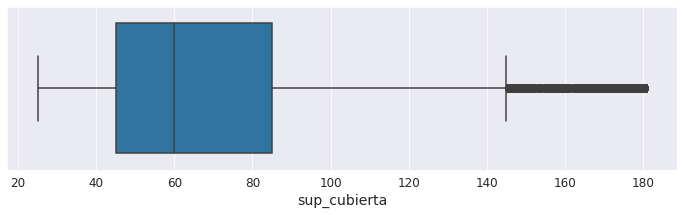

In [192]:
plt.figure(figsize=(12,3))
sns.boxplot(data=df3, x='sup_cubierta')
plt.show()
plt.figure(figsize=(12,3))
sns.boxplot(data=df_out, x='sup_cubierta')
plt.show()

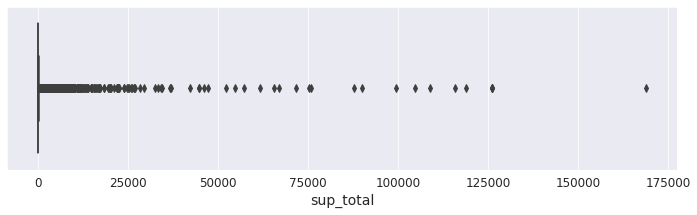

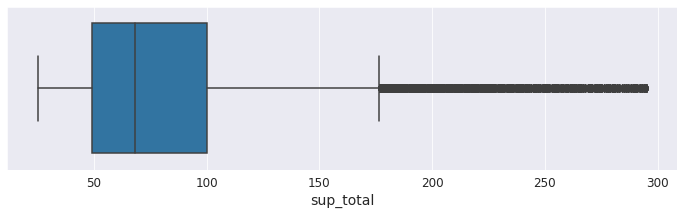

In [193]:
plt.figure(figsize=(12,3))
sns.boxplot(data=df3, x='sup_total')
plt.show()
plt.figure(figsize=(12,3))
sns.boxplot(data=df_out, x='sup_total')
plt.show()

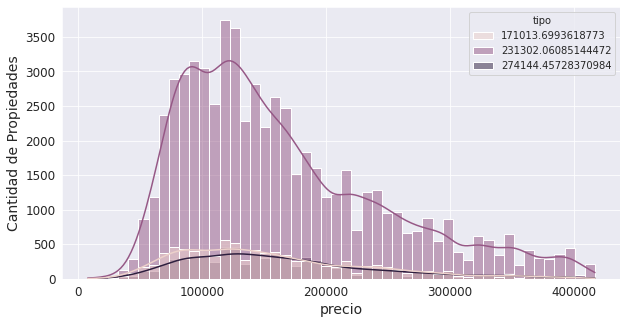

In [194]:
plt.figure(figsize=(10,5))
g = sns.histplot(data=df_out, x='precio', kde=True, bins=50, hue='tipo')
plt.ylabel("Cantidad de Propiedades")
plt.show()

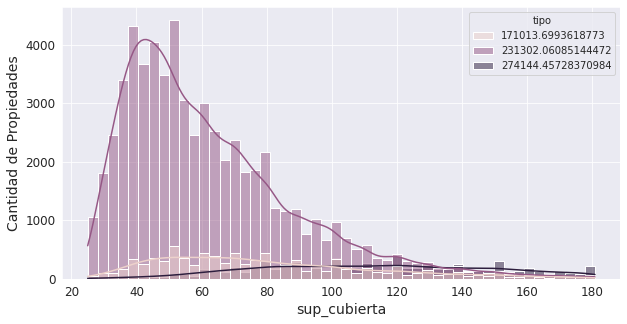

In [195]:
plt.figure(figsize=(10,5))
g = sns.histplot(data=df_out, x='sup_cubierta', kde=True, bins=50, hue='tipo')
plt.ylabel("Cantidad de Propiedades")
plt.show()

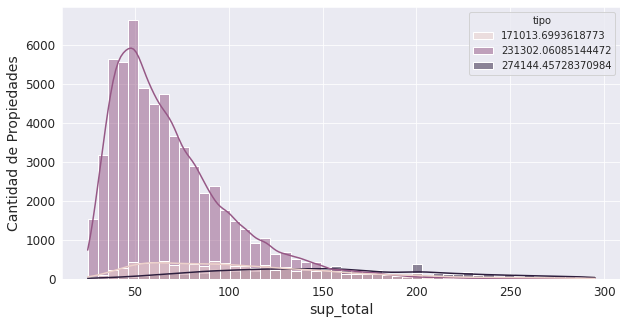

In [196]:
plt.figure(figsize=(10,5))
g = sns.histplot(data=df_out, x='sup_total', kde=True, bins=50, hue='tipo')
plt.ylabel("Cantidad de Propiedades")
plt.show()

In [197]:
df_out.describe()

,lat,lon,zona,barrio,ambientes,dormitorios,baños,sup_total,sup_cubierta,precio,tipo
count,78429.0000,78429.0000,78429.0000,78429.0000,78429.0000,78429.0000,78429.0000,78429.0000,78429.0000,78429.0000,78429.0000
mean,-34.6026,-58.4644,235818.1333,221921.9302,2.7634,1.7487,1.3548,81.8980,69.2531,164081.4251,228509.7317
std,0.6121,0.6299,36262.1124,92735.9345,1.0832,0.9258,0.6030,46.3943,32.2693,81565.2739,24034.6888
min,-35.1208,-180.0000,154200.2163,95836.8802,1.0000,0.0000,1.0000,25.0023,25.0023,7500.0000,171013.6994
25%,-34.6313,-58.5124,237758.7481,151307.3264,2.0000,1.0000,1.0000,49.0000,45.0000,100000.0000,231302.0609
50%,-34.6022,-58.4518,258249.1514,191678.6180,3.0000,2.0000,1.0000,68.0000,60.0000,145000.0000,231302.0609
75%,-34.5712,-58.4078,258249.1514,259969.8507,3.0000,2.0000,2.0000,100.0000,85.0000,210000.0000,231302.0609
max,85.0511,-57.8377,258249.1514,935940.7996,35.0000,15.0000,14.0000,295.0000,180.8678,417000.0000,274144.4573


In [198]:
df_out.shape

(78429, 11)

##### **Reentrenamiento de <u>Modelo Sprint 1<u>**

In [199]:
# Definimos las variables de predictoras y la variable a predecir
data = df_out.copy()
# X = data.drop(['precio', 'tipo', 'barrio', 'zona'], axis=1)
X = data.drop(['precio'], axis=1)
# X = data[['surface_total']]
y = data['precio']

In [200]:
# En caso que la variable predictora sea una sola, graficamos la variable predecir en función de la predictora.
# Si no se cumple la condición, no se realiza el gráfico.
if X.shape[1] == 1:
  plt.figure(figsize=(10, 8))
  plt.scatter(X,y, s = 2)
  plt.xlabel('Superficie total [m2]')
  plt.ylabel('Precio [usd]')
  plt.legend()
  plt.show()

In [201]:
# Hacemos la división entre datos de entrenamiento y datos de testeo.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(54900, 10) (54900,) (23529, 10) (23529,)


In [202]:
# Importamos las librerías de los modelos a utilizar
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Instanciamos lo modelos
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=19, random_state=0, max_features=2, min_samples_leaf=0.00015704594766823636, min_samples_split= 0.0003043067752731219, criterion='mae')
knn_regressor = KNeighborsRegressor(n_neighbors=3)

In [203]:
# Entrenamos los modelos
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [204]:
# En caso que la variable predictora sea una sola, graficamos la variable predecir en función de la predictora para los tres modelos.
if X.shape[1] == 1 :
  plt.figure(figsize = (20,6))

  plt.subplot(1,3,1)
  plt.scatter(X,y, s = 2)
  plt.plot(X,linear_model.predict(X),label ='Regresion Lineal', c = 'g')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()

  plt.subplot(1,3,2)
  plt.scatter(X,y, s = 2)
  plt.plot(X,tree_regressor.predict(X),label ='Árbol de Decisión', c = 'g')

  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()

  plt.subplot(1,3,3)
  plt.scatter(X,y, s = 2)
  plt.plot(X,knn_regressor.predict(X),label ='knn', c = 'g')

  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()

  plt.tight_layout()
  plt.show()

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 48797.11029777202
Raíz del error cuadrático medio en Test: 48659.273512289335


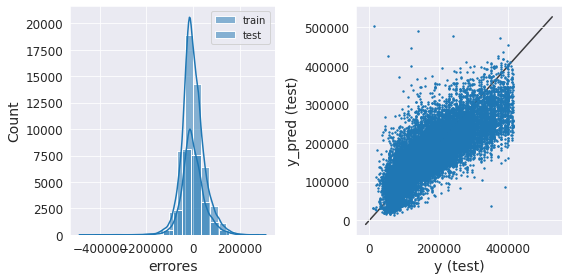

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 36191.93048942468
Raíz del error cuadrático medio en Test: 40739.54057424221


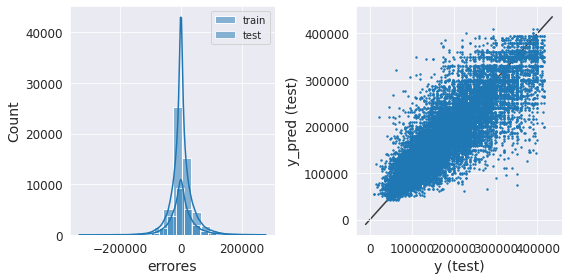

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 27578.02032064895
Raíz del error cuadrático medio en Test: 40249.466335531906


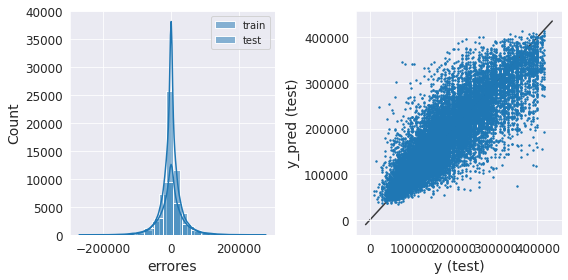

In [205]:
# Luego analizamos la distribución de los errores de las predicciones de cada modelo
# y calculamos la raíz del error cuadrático medio de la cada modelo con los hiperparámetros utilizados
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.histplot(y_train - y_train_pred, bins = 20, label = 'train', kde=True)
    sns.histplot(y_test - y_test_pred, bins = 20, label = 'test', kde=True)
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

In [206]:
# Ahora vamos a analizar el R2 que puede darnos una idea más comparable del 
# ajuste de los datos predichos con los datos reales de la muestra.
# Importamos la metrica
from sklearn.metrics import r2_score

In [207]:
# Primero calculamos el R^2 del benchmark: Modelo de Regresión Lineal
r2_test_lin = r2_score(y_test,linear_model.predict(X_test))
r2_train_lin = r2_score(y_train,linear_model.predict(X_train))
print('r2_train_lin:', r2_train_lin)
print('r2_test_lin:', r2_test_lin)

r2_train_lin: 0.6417436545174385
r2_test_lin: 0.64484396894839


In [208]:
# Vamos a calcular los R2 variando los hiperparámetros de entrenamiento del modelo
# Definimos las listas vacias para los valores de accuracy deseados
lista_rsme_train = []
lista_rsme_test = []
lista_r2_train = []
lista_r2_test = []

# Definimos la lista de valores de k que vamos a explorar
max_depths = np.arange(1,25, 1)

# Generamos un loop sobre los distintos valores de k 
for d in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = DecisionTreeRegressor(max_depth = d)
    
    # Entrenar el modelo
    clf.fit(X_train, y_train)
    

    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)
    # train_acc = clf.score(X_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    # test_acc = clf.score(X_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_rsme_train.append(rmse_train)
    lista_rsme_test.append(rmse_test)
    lista_r2_train.append(r2_train)
    lista_r2_test.append(r2_test)
  

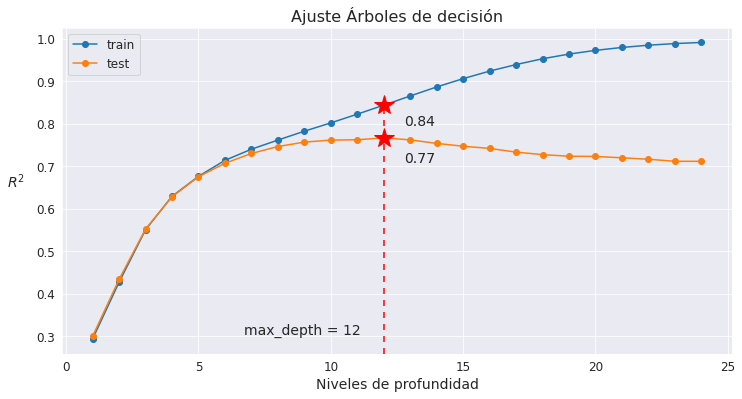

In [209]:
# A continuación creamos el gráfico de los R^2 en función de los niveles de profundidad máxima del modelo de Árboles de decisión.
# Adicionalmente, marcamos el punto óptimo que maximiza el R2 en los datos de testeo.
# Este punto sería el máximo a considerar para definir la profundidad del Árbol de decisión, ya que queremos minimizar el costo computacional de entrenamiento.
plt.figure(figsize=(12,6))
plt.plot(max_depths, lista_r2_train,'o-',label='train' )
plt.plot(max_depths, lista_r2_test,'o-',label='test')

max_r2_test_tree = max(lista_r2_test)
# max_r2_test_tree = np.quantile(lista_r2_test, 0.55, interpolation='nearest')
max_depth = max_depths[np.where(lista_r2_test == max_r2_test_tree)[0][0]]
r_train_tree = lista_r2_train[np.where(lista_r2_test == max_r2_test_tree)[0][0]]

plt.plot(max_depth, max_r2_test_tree, '*r', markersize=20)
plt.plot(max_depth, r_train_tree, '*r', markersize=20)
y_min = plt.gca().get_ylim()[0]
y_max = plt.gca().get_ylim()[1]
plt.axvline(x=max_depth, color='r', ymax=(r_train_tree - y_min) / (y_max-y_min), dashes=(4,4))

plt.annotate(np.round(max_r2_test_tree,2), xy=(max_depth, max_r2_test_tree), xytext=(20, -25), size=14, xycoords='data', textcoords='offset points')
plt.annotate(np.round(r_train_tree, 2), xy=(max_depth, r_train_tree), xytext=(20, -20), size=14,xycoords='data', textcoords='offset points')
plt.annotate("max_depth = " + str(np.round(max_depth, 0)), xy=(max_depth, y_min), xytext=(-140, 20), size=14,xycoords='data', textcoords='offset points')

plt.legend(fontsize=12)
plt.title('Ajuste Árboles de decisión')
plt.xlabel('Niveles de profundidad')
plt.ylabel('$R^2$', rotation=0, size=14, labelpad=20)

plt.show()

In [210]:
# Repetimos lo anterior, pero para el modelo de Vecinos más cercanos
# Definimos las listas vacias para los valores de accuracy deseados
lista_rsme_train = []
lista_rsme_test = []
lista_r2_train = []
lista_r2_test = []
time_list = []
# fisrt_time = milisecs(datetime.now())

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = np.arange(1,26, 1)

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors = k)
    
    # Entrenar el modelo
    clf.fit(X_train, y_train)

    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)
    # train_acc = clf.score(X_train, y_train_pred)
    # time = milisecs(datetime.now()) - fisrt_time
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    # test_acc = clf.score(X_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_rsme_train.append(rmse_train)
    lista_rsme_test.append(rmse_test)
    lista_r2_train.append(r2_train)
    lista_r2_test.append(r2_test)
    # time_list.append(time)

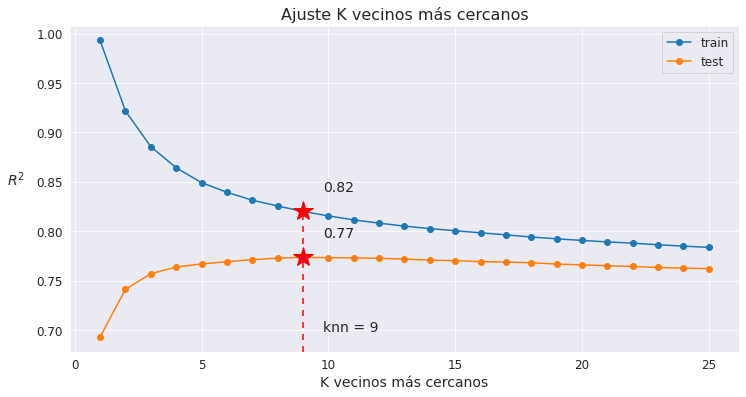

In [211]:
# A continuación creamos el gráfico de los R^2 en función de la cantidad de vecinos del modelo de KNN.

plt.figure(figsize=(12,6))
plt.plot(k_vecinos, lista_r2_train,'o-',label='train' )
plt.plot(k_vecinos, lista_r2_test,'o-',label='test')

max_r2_test_knn = max(lista_r2_test)
n = k_vecinos[np.where(lista_r2_test == max_r2_test_knn)[0][0]]
r_train_knn = lista_r2_train[np.where(lista_r2_test == max_r2_test_knn)[0][0]]

plt.plot(n, max_r2_test_knn, '*r', markersize=20)
plt.plot(n, r_train_knn, '*r', markersize=20)
y_min = plt.gca().get_ylim()[0]
y_max = plt.gca().get_ylim()[1]
plt.axvline(x=n, color='r', ymax=(r_train_knn-y_min) / (y_max-y_min), dashes=(4,4))

plt.annotate(np.round(max_r2_test_knn,2), xy=(n, max_r2_test_knn), xytext=(20, 20), size=14, xycoords='data', textcoords='offset points')
plt.annotate(np.round(r_train_knn, 2), xy=(n, r_train_knn), xytext=(20, 20), size=14,xycoords='data', textcoords='offset points')
plt.annotate("knn = " + str(np.round(n, 0)), xy=(n, y_min), xytext=(20, 20), size=14,xycoords='data', textcoords='offset points')

plt.legend(fontsize=12)
plt.title('Ajuste K vecinos más cercanos')
plt.xlabel('K vecinos más cercanos')
plt.ylabel('$R^2$', rotation=0, size=14, labelpad=20)
plt.show()

In [212]:
# Creamos una tabla con los resultados
# LIN = Regresión lineal
# TREE = Modelo de Árboles de decisión
# LIN = Regresión lineal

res2 = pd.DataFrame([['-', np.round(r2_train_lin, 2), np.round(r2_test_lin, 2)],
                    [max_depth, np.round(r_train_tree, 2), np.round(max_r2_test_tree, 2)], 
                    [n, np.round(r_train_knn, 2), np.round(max_r2_test_knn, 2)]], 
                   columns=['Parámetro', 'R2_train', 'R2_test'], index=['LIN', 'TREE', 'KNN'])
res2 = res2.transpose()
res2

,LIN,TREE,KNN
Parámetro,-,12,9
R2_train,0.6400,0.8400,0.8200
R2_test,0.6400,0.7700,0.7700


In [213]:
# Resultados del sprint 1
res1 = pd.DataFrame([['-', 0.55, 0.55],[17, 0.95, 0.77],[3, 0.88, 0.75]], 
                   columns=['Parámetro', 'R2_train', 'R2_test'], index=['LIN', 'TREE', 'KNN'])
res1 = res1.transpose()
res1

,LIN,TREE,KNN
Parámetro,-,17,3
R2_train,0.5500,0.9500,0.8800
R2_test,0.5500,0.7700,0.7500


##### **Evaluación de desempeño**

### **Modelos Avanzados**
***

##### **Elección de Modelos Avanzados**

##### **Entrenamiento de modelos**

##### **Evaluación de modelos**

##### **Optimización de hiperparámetros**

### GPMINIMIZE

In [214]:
from sklearn.tree import DecisionTreeRegressor

In [215]:
# Creamos el objeto regresor
regressor = DecisionTreeRegressor()

In [216]:
# Lo fitteamos a la data de train
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [217]:
# Definimos aquellos parámetros que queremos colocar, pero que queremos NO mover luego
FIXED_PARAMS = {         
                'random_state': 0,           
                     }

Ahora definiremos el espacio de búsqueda. Es decir, entre que valores vamos a buscar los hiperparámetros

In [218]:
! pip install scikit-optimize

In [219]:
from skopt.space import Real, Integer, Categorical
cant_columnas = X_train.shape[1]
space= [          
             Categorical(['mse','mae'], name='criterion')
            ,Integer(2, 50, name='max_depth') # maxima profundidad de cada árbol (aquí sí es mejor que sean profundos, porque no se concatenan, son independientes)
            ,Integer(10, 100, name='min_samples_split') # mínima cantidad de registros para abrir una rama
            ,Integer(5, 50, name='min_samples_leaf') # mínima cantidad de registros para abrir una hoja
            ,Integer(round(cant_columnas*0.1), round(cant_columnas*0.8), name='max_features') # máxima cantidad de atributos (columnas) que puede usar cada árbol
            ]
# listamos los nombres de los parámetros cuyo espacio de búsqueda acabamos de definir
param_names = ['criterion','max_depth','min_samples_split','min_samples_leaf','max_features']

Definimos una funcion de métricas de evaluacion (para obtener RMSE)

In [220]:
from sklearn.metrics import roc_auc_score, mean_squared_error
def eval_metrics(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred, squared=False) 
    return rmse

Lo más importante: definimos todo lo que es nuestra "función objetivo". Es decir, lo que queremos que se haga en cada iteración!

In [221]:
# 6) Definimos la funcion objetivo, que se utilizará a cada iteración de la búsqueda
# creamos una lista para guardar los resultados
lista_results = []
lista_test_scores_cv = []
lista_train_scores_cv = []
lista_test_std_cv = []

from skopt.utils import use_named_args
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

@use_named_args(space)
def objective(**params):

    # seteamos los parámetros fijos
    regressor.set_params(**FIXED_PARAMS)
    # y los parámetros de cada iteración (se setearán automáticamente así)
    regressor.set_params(**params)
    
    ####################################################################################
    ############################# USAMOS CROSS VALIDATION ##############################
    ####################################################################################
    # Ahora en vez de eso calculamos nuestros scores de test de un cross validation
    # Recordemos, este objeto devuelve un array de todos los test_scores y tambien de los train_scores hallados --> nuestra loss será el promedio de los test_scores
    model_i_scores = cross_validate(regressor, X_train, y_train, cv=3, scoring=  make_scorer(eval_metrics), return_train_score=True)
    mean_test_scores = model_i_scores['test_score'].mean()
    # Peeero tambien nos guardamos los promedios de train para poder ver si en general se estuvo overfitteando o no 
    mean_train_scores = model_i_scores['train_score'].mean()
    # Por último, resulta interesante ver cuan volatil fueron esos test_scores. Así que tomamos su desvio standard (std)
    std_test_scores = model_i_scores['test_score'].std()
    
    # Ahora guardamos estos datos en las listas vacias que creamos antes, así nos quedan bien guardados
    lista_test_scores_cv.append(mean_test_scores) # test
    lista_train_scores_cv.append(mean_train_scores) # train
    lista_test_std_cv.append(std_test_scores) # std de test
 
    # Definimos que la funcion de perdida sea el promedio de los scores de test
    loss = mean_test_scores
    ####################################################################################
    ####################################################################################
    ####################################################################################
    
    return loss 

In [222]:
# 7) Ejecutamos la búsqueda de los hiperparámetros 

from skopt import gp_minimize, forest_minimize, dump
# import joblib
from tqdm.notebook import tqdm

# Armamos una calse con tqdm para poder ver el progreso de la búsqueda
class tqdm_skopt(object):
    def __init__(self, **kwargs):
        self._bar = tqdm(**kwargs)
    def __call__(self, res):
        self._bar.update()
        
# Cantidad de iteraciones para la búsqueda (utilizar muchas, aqui usamos 50 solo por probar)
cantidad_iteraciones = 50

# Búsqueda
res = gp_minimize(
                    objective
                    ,space
                    ,n_calls = cantidad_iteraciones
                    ,n_initial_points = int(round(cantidad_iteraciones*0.2)) # Cantidad de iteraciones iniciales random (20% es significativo, pero dando mucho espacio para que el algoritmo optimice)
                    ,n_jobs=1
                    ,random_state = 0
                    ,verbose=1
                    ,callback=[tqdm_skopt(total=cantidad_iteraciones, desc="Gaussian Process")]
                    )

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.2401
Function value obtained: 40870.8588
Current minimum: 40870.8588
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 40.1898
Function value obtained: 41247.3868
Current minimum: 40870.8588
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.1730
Function value obtained: 41730.0329
Current minimum: 40870.8588
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.3452
Function value obtained: 39883.9048
Current minimum: 39883.9048
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 56.0587
Function value obtained: 41204.0048
Current minimum: 3988

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 0.5508
Function value obtained: 39883.9048
Current minimum: 39883.9048
Iteration No: 13 started. Searching for the next optimal point.
Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 0.6270
Function value obtained: 39927.0626
Current minimum: 39883.9048
Iteration No: 14 started. Searching for the next optimal point.
Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 0.7051
Function value obtained: 40026.5411
Current minimum: 39883.9048
Iteration No: 15 started. Searching for the next optimal point.
Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 0.6218
Function value obtained: 40063.9316
Current minimum: 39883.9048
Iteration No: 16 started. Searching for the next optimal point.
Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 0.6268
Function value obtained: 39708.6456
Current minimum: 

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 0.5949
Function value obtained: 40026.5411
Current minimum: 39708.6456
Iteration No: 20 started. Searching for the next optimal point.
Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 0.6275
Function value obtained: 39979.3515
Current minimum: 39708.6456
Iteration No: 21 started. Searching for the next optimal point.
Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 0.6336
Function value obtained: 39863.3139
Current minimum: 39708.6456
Iteration No: 22 started. Searching for the next optimal point.
Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 0.6354
Function value obtained: 39885.3822
Current minimum: 39708.6456
Iteration No: 23 started. Searching for the next optimal point.


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 0.6370
Function value obtained: 39863.3139
Current minimum: 39708.6456
Iteration No: 24 started. Searching for the next optimal point.


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 0.6368
Function value obtained: 39885.3822
Current minimum: 39708.6456
Iteration No: 25 started. Searching for the next optimal point.


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 0.6475
Function value obtained: 39863.3139
Current minimum: 39708.6456
Iteration No: 26 started. Searching for the next optimal point.


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 0.6403
Function value obtained: 40026.5411
Current minimum: 39708.6456
Iteration No: 27 started. Searching for the next optimal point.


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 0.7538
Function value obtained: 39885.3822
Current minimum: 39708.6456
Iteration No: 28 started. Searching for the next optimal point.


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 0.6359
Function value obtained: 39979.3515
Current minimum: 39708.6456
Iteration No: 29 started. Searching for the next optimal point.


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 0.6935
Function value obtained: 39927.0626
Current minimum: 39708.6456
Iteration No: 30 started. Searching for the next optimal point.


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 0.6762
Function value obtained: 39708.6456
Current minimum: 39708.6456
Iteration No: 31 started. Searching for the next optimal point.


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 31 ended. Search finished for the next optimal point.
Time taken: 0.6287
Function value obtained: 40026.5411
Current minimum: 39708.6456
Iteration No: 32 started. Searching for the next optimal point.


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Iteration No: 32 ended. Search finished for the next optimal point.
Time taken: 0.7476
Function value obtained: 40063.9316
Current minimum: 39708.6456
Iteration No: 33 started. Searching for the next optimal point.
Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 0.7298
Function value obtained: 41178.1707
Current minimum: 39708.6456
Iteration No: 34 started. Searching for the next optimal point.
Iteration No: 34 ended. Search finished for the next optimal point.
Time taken: 0.8616
Function value obtained: 39956.9379
Current minimum: 39708.6456
Iteration No: 35 started. Searching for the next optimal point.
Iteration No: 35 ended. Search finished for the next optimal point.
Time taken: 0.9093
Function value obtained: 39892.7806
Current minimum: 39708.6456
Iteration No: 36 started. Searching for the next optimal point.
Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 0.8654
Function value obtained: 39957.0821
Current minimum: 

In [223]:
res.x

['mse', 19, 91, 10, 7]

In [224]:
res.fun

39684.361816400306

In [225]:
res.space

Space([Categorical(categories=('mse', 'mae'), prior=None),
       Integer(low=2, high=50, prior='uniform', transform='normalize'),
       Integer(low=10, high=100, prior='uniform', transform='normalize'),
       Integer(low=5, high=50, prior='uniform', transform='normalize'),
       Integer(low=1, high=8, prior='uniform', transform='normalize')])

In [226]:
res.specs

{'args': {'acq_func': 'gp_hedge',
  'acq_optimizer': 'auto',
  'base_estimator': GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                           kernel=1**2 * Matern(length_scale=[1, 1, 1, 1, 1], nu=2.5),
                           n_restarts_optimizer=2, noise='gaussian',
                           normalize_y=True, optimizer='fmin_l_bfgs_b',
                           random_state=209652396),
  'callback': [<__main__.tqdm_skopt at 0x7f48c1288910>,
  'dimensions': Space([Categorical(categories=('mse', 'mae'), prior=None),
         Integer(low=2, high=50, prior='uniform', transform='normalize'),
         Integer(low=10, high=100, prior='uniform', transform='normalize'),
         Integer(low=5, high=50, prior='uniform', transform='normalize'),
         Integer(low=1, high=8, prior='uniform', transform='normalize')]),
  'func': <function __main__.objective>,
  'initial_point_generator': 'random',
  'kappa': 1.96,
  'model_queue_size': None,
  'n_calls': 50,
  'n_initi

In [227]:
res.x_iters

[['mse', 43, 87, 43, 5],
 ['mae', 16, 15, 17, 4],
 ['mse', 25, 45, 43, 3],
 ['mse', 20, 96, 11, 7],
 ['mae', 40, 57, 36, 6],
 ['mse', 28, 78, 10, 4],
 ['mae', 37, 29, 11, 3],
 ['mae', 13, 45, 46, 4],
 ['mse', 45, 19, 49, 6],
 ['mae', 19, 78, 32, 3],
 ['mae', 31, 59, 40, 3],
 ['mse', 20, 96, 11, 7],
 ['mse', 21, 96, 11, 7],
 ['mse', 12, 96, 11, 7],
 ['mse', 15, 96, 11, 7],
 ['mse', 17, 96, 11, 7],
 ['mse', 24, 96, 11, 7],
 ['mse', 13, 96, 11, 7],
 ['mse', 12, 96, 11, 7],
 ['mse', 16, 96, 11, 7],
 ['mse', 28, 96, 11, 7],
 ['mse', 18, 96, 11, 7],
 ['mse', 28, 96, 11, 7],
 ['mse', 18, 96, 11, 7],
 ['mse', 24, 96, 11, 7],
 ['mse', 12, 96, 11, 7],
 ['mse', 18, 96, 11, 7],
 ['mse', 16, 96, 11, 7],
 ['mse', 21, 96, 11, 7],
 ['mse', 17, 96, 11, 7],
 ['mse', 12, 96, 11, 7],
 ['mse', 15, 96, 11, 7],
 ['mse', 9, 96, 11, 7],
 ['mse', 20, 98, 16, 7],
 ['mse', 24, 95, 10, 7],
 ['mse', 21, 96, 14, 7],
 ['mse', 18, 94, 12, 7],
 ['mse', 21, 97, 12, 7],
 ['mse', 24, 98, 10, 7],
 ['mse', 16, 87, 10, 6],
 

In [228]:
res.func_vals 

array([40870.85879899, 41247.38681066, 41730.03294916, 39883.90478474,
       41204.00476133, 40174.12229352, 41350.2942289 , 42139.9562901 ,
       40823.26337808, 41998.1291481 , 42257.05234642, 39883.90478474,
       39927.06256584, 40026.54106287, 40063.93156391, 39708.64559082,
       39863.31391129, 40004.67005063, 40026.54106287, 39979.35147999,
       39863.31391129, 39885.3821869 , 39863.31391129, 39885.3821869 ,
       39863.31391129, 40026.54106287, 39885.3821869 , 39979.35147999,
       39927.06256584, 39708.64559082, 40026.54106287, 40063.93156391,
       41178.17072791, 39956.93785446, 39892.78061692, 39957.08208126,
       39814.36431486, 39984.73731756, 39780.4792594 , 39999.40906179,
       39830.0525624 , 39838.17789653, 40206.94101044, 39978.91530325,
       39896.07062064, 39836.50735151, 40018.78682998, 39684.3618164 ,
       39836.50735151, 39875.01903501])

Armamos un dataframe con los resultados

In [229]:
df_vemos_que_paso = pd.DataFrame(res.x_iters)
df_vemos_que_paso.columns = param_names
df_vemos_que_paso['funcion_costo'] = res.func_vals
df_vemos_que_paso['numero_de_iteracion'] = df_vemos_que_paso.reset_index()['index']
df_vemos_que_paso['score_train'] = lista_train_scores_cv
df_vemos_que_paso['score_test'] = lista_test_scores_cv
df_vemos_que_paso['dif_train_test'] = df_vemos_que_paso['score_test'] - df_vemos_que_paso['score_train']
df_vemos_que_paso['std_test'] = lista_test_std_cv
df_vemos_que_paso.sort_values('funcion_costo', ascending=True, inplace=True)
df_vemos_que_paso

,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,funcion_costo,numero_de_iteracion,score_train,score_test,dif_train_test,std_test
47,mse,19,91,10,7,39684.3618,47,36227.4354,39684.3618,3456.9264,268.2235
29,mse,17,96,11,7,39708.6456,29,36281.5998,39708.6456,3427.0458,469.8466
15,mse,17,96,11,7,39708.6456,15,36281.5998,39708.6456,3427.0458,469.8466
38,mse,24,98,10,7,39780.4793,38,36413.4033,39780.4793,3367.0760,302.4813
36,mse,18,94,12,7,39814.3643,36,36430.0697,39814.3643,3384.2947,307.1957
40,mse,17,94,10,7,39830.0526,40,36246.9676,39830.0526,3583.0849,429.8851
45,mse,24,89,10,7,39836.5074,45,36150.2982,39836.5074,3686.2092,381.8792
48,mse,22,89,10,7,39836.5074,48,36150.2982,39836.5074,3686.2092,381.8792
41,mse,27,92,10,7,39838.1779,41,36192.8785,39838.1779,3645.2994,346.8130
24,mse,24,96,11,7,39863.3139,24,36341.2170,39863.3139,3522.0969,347.3644


No handles with labels found to put in legend.


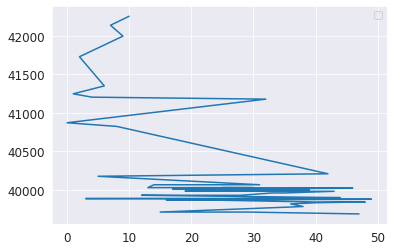

In [230]:
import matplotlib.pyplot as plt
plt.plot(df_vemos_que_paso['numero_de_iteracion'], df_vemos_que_paso['funcion_costo'])

plt.legend()
plt.show()

### Armamos un diccionario con los mejores hiperparametros

In [231]:
# Armamos un diccionario a partir de 2 listas: la primera es los nombres que tienen los hiperparametros, y la otra son los mejores que se encontraron
mejores_hp = dict(zip(param_names, res.x))
# Pero adem{as le agregamos aquellos hiperparametros que dejamos fijos (en nuestro caso solo fue el random_state)
mejores_hp.update(FIXED_PARAMS)

In [232]:
mejores_hp

{'criterion': 'mse',
 'max_depth': 19,
 'max_features': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 91,
 'random_state': 0}

In [233]:
# Colocamos esos mejores hiperparametros en nuestro modelo
regressor.set_params(**mejores_hp)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=19,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=91,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [234]:
# Entrenamos ese arbol que ya tiene los hiperparametros correctos
regressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=19,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=91,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [236]:
pip install shap

     |████████████████████████████████| 358kB 7.2MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491617 sha256=805ca87b87650dce228dcbfa9767f9e968405e811c71d0bca5cda6af5ceae974
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [237]:
import shap

In [239]:
# Utilizamos el explicador de SHAP
explainer = shap.TreeExplainer(regressor)
# Y pedimos que nos otorgue los valores de importancia que tendrá en el dataframe de validacion
shap_values = explainer.shap_values(X_test)

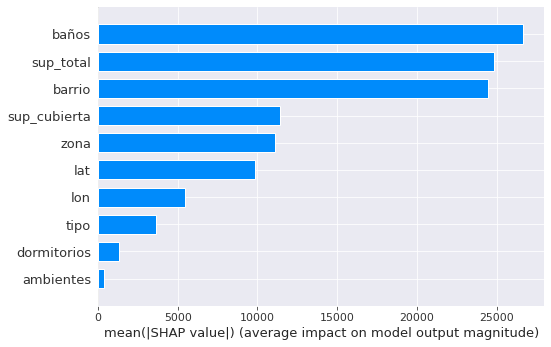

In [240]:
# Graficamos solo la importancia de cada variable
shap.summary_plot(shap_values, X_test, plot_type="bar")

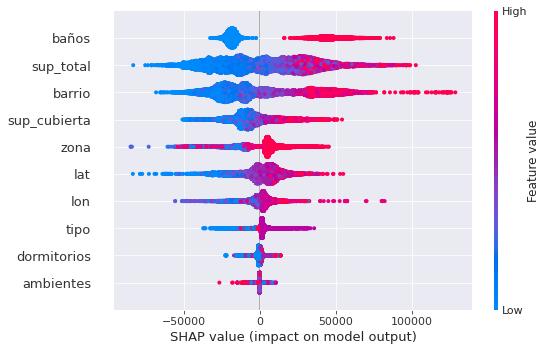

In [241]:
# Graficamos el impacto de cada variable 
# recordemos, para leer el grafico: 
# - los colores significan los valores de la variable --> ej: un punto de V5 que esté en color fucsia, es un valor alto de V5
# - el eje x significa cuanto impacta sobre el output --> ej: los puntos fucsias de V5 están a la derecha, así que impactan positivamente sobre el output
# Entonces: A mayor valor de V5, mayor valor del output en general. Y así se podría analizar cada variable

shap.summary_plot(shap_values, X_test)

[Text(697.301279831069, 1060.02, 'X[6] <= 1.5\nmse = 6646520022.431\nsamples = 54900\nvalue = 163767.625'),
 Text(453.0793875134072, 1005.6600000000001, 'X[7] <= 59.987\nmse = 3719506063.637\nsamples = 38377\nvalue = 134810.357'),
 Text(253.31236592777975, 951.3000000000001, 'X[3] <= 259073.203\nmse = 1671841466.438\nsamples = 20601\nvalue = 110513.93'),
 Text(144.72439220593492, 896.94, 'X[3] <= 158865.164\nmse = 976588837.569\nsamples = 14799\nvalue = 97397.706'),
 Text(81.7615302109403, 842.58, 'X[5] <= 1.5\nmse = 582975799.335\nsamples = 6599\nvalue = 82506.894'),
 Text(48.07937075437969, 788.22, 'X[7] <= 41.93\nmse = 495365272.104\nsamples = 5364\nvalue = 79872.988'),
 Text(24.072935287808363, 733.8600000000001, 'X[2] <= 248003.953\nmse = 287483805.559\nsamples = 2428\nvalue = 70508.419'),
 Text(10.905970682874507, 679.5, 'X[7] <= 34.995\nmse = 234287365.237\nsamples = 1120\nvalue = 63820.955'),
 Text(4.2559885591705395, 625.1400000000001, 'X[8] <= 29.989\nmse = 176122573.277\nsam

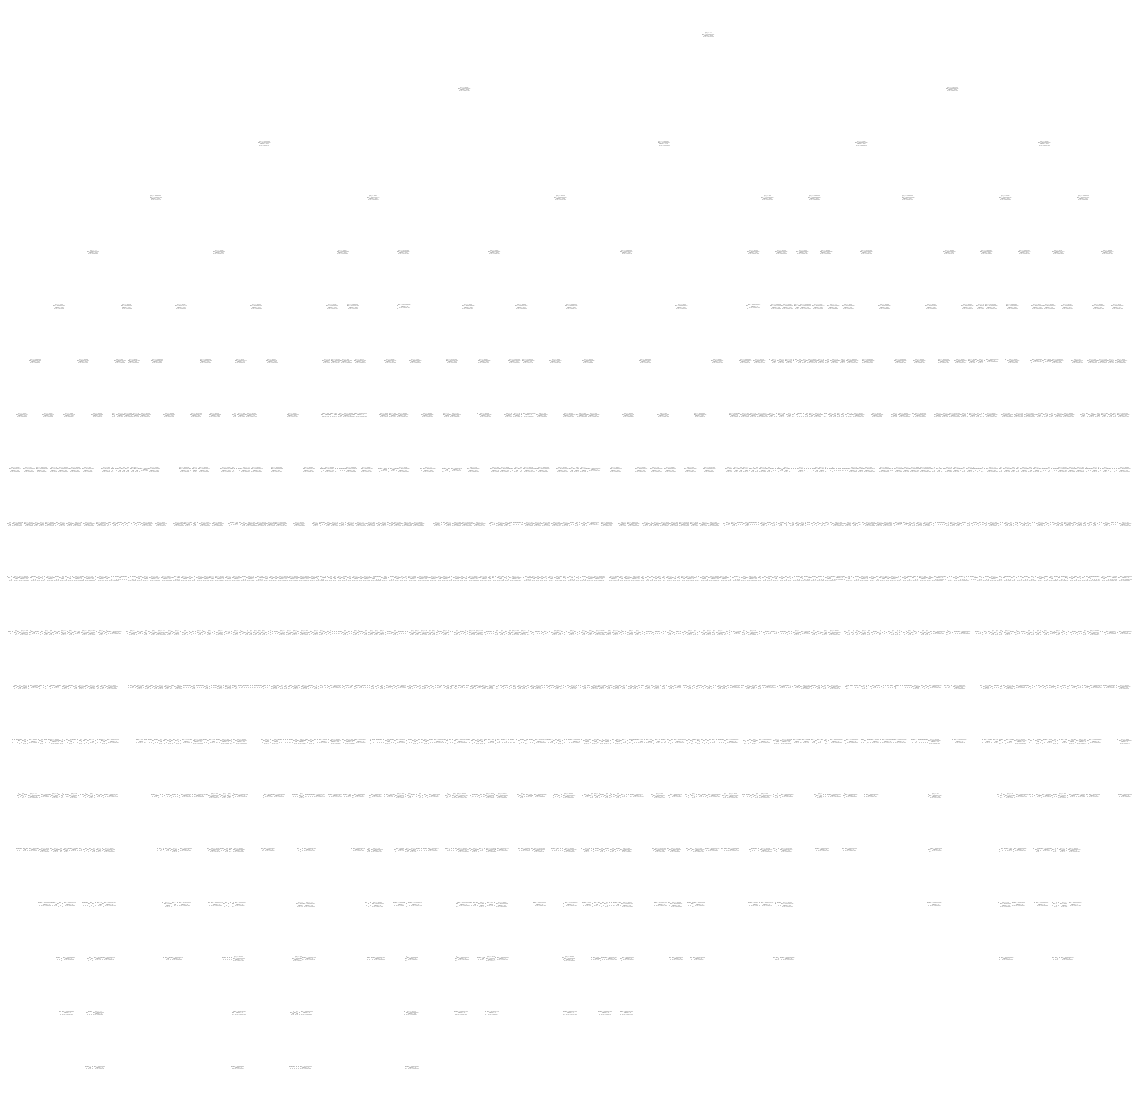

In [242]:
# Graficamos como queda el arbol terminado
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
tree.plot_tree(regressor) 


### OPTUNA

In [243]:
! pip install optuna

In [244]:
param_names

['criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'max_features']

In [245]:
import joblib

In [246]:
def objective(trial):    
    
    joblib.dump(study, 'study.pkl')
    
    tree_criterion = trial.suggest_categorical('criterion', ['mse', 'mae']) 
    tree_max_depth = trial.suggest_int('max_depth', 5, 50) 
    tree_min_samples_split = trial.suggest_int('min_samples_split', 20, 100) 
    tree_min_samples_leaf = trial.suggest_int('min_samples_leaf', 5, 50) 
    tree_max_features = trial.suggest_int('max_features', round(cant_columnas*0.1), round(cant_columnas*0.8)) 

    params = {
        'criterion': tree_criterion,
        'max_depth': tree_max_depth,
        'min_samples_split': tree_min_samples_split,
        'min_samples_leaf': tree_min_samples_leaf,
        'max_features': tree_max_features
    }
    
    regressor.set_params(**params)

    ####################################################################################
    ############################# USAMOS CROSS VALIDATION ##############################
    ####################################################################################
    # Ahora en vez de eso calculamos nuestros scores de test de un cross validation
    # Recordemos, este objeto devuelve un array de todos los test_scores y tambien de los train_scores hallados --> nuestra loss será el promedio de los test_scores
    model_i_scores = cross_validate(regressor, X_train, y_train, cv=3, scoring=  make_scorer(eval_metrics), return_train_score=True)
    mean_test_scores = model_i_scores['test_score'].mean()
    # Peeero tambien nos guardamos los promedios de train para poder ver si en general se estuvo overfitteando o no 
    mean_train_scores = model_i_scores['train_score'].mean()
    # Por último, resulta interesante ver cuan volatil fueron esos test_scores. Así que tomamos su desvio standard (std)
    std_test_scores = model_i_scores['test_score'].std()
    
    # Ahora guardamos estos datos en las listas vacias que creamos antes, así nos quedan bien guardados
    lista_test_scores_cv.append(mean_test_scores) # test
    lista_train_scores_cv.append(mean_train_scores) # train
    lista_test_std_cv.append(std_test_scores) # std de test
 
    # Definimos que la funcion de perdida sea el promedio de los scores de test
    loss = mean_test_scores
    ####################################################################################
    ####################################################################################
    ####################################################################################

    return loss

In [247]:
import optuna

In [248]:
study = optuna.create_study()


[I 2021-07-02 23:34:20,711] A new study created in memory with name: no-name-3dd286d5-971e-41c9-83f2-a08d698ebefb


In [249]:
study.optimize(objective, n_trials=50)

[I 2021-07-02 23:34:23,292] Trial 0 finished with value: 40717.70331526042 and parameters: {'criterion': 'mse', 'max_depth': 26, 'min_samples_split': 95, 'min_samples_leaf': 46, 'max_features': 6}. Best is trial 0 with value: 40717.70331526042.
[I 2021-07-02 23:34:38,617] Trial 1 finished with value: 45342.166845009895 and parameters: {'criterion': 'mae', 'max_depth': 41, 'min_samples_split': 89, 'min_samples_leaf': 6, 'max_features': 1}. Best is trial 0 with value: 40717.70331526042.
[I 2021-07-02 23:34:38,800] Trial 2 finished with value: 41270.358157270246 and parameters: {'criterion': 'mse', 'max_depth': 15, 'min_samples_split': 30, 'min_samples_leaf': 30, 'max_features': 3}. Best is trial 0 with value: 40717.70331526042.
[I 2021-07-02 23:35:56,019] Trial 3 finished with value: 41078.40119992686 and parameters: {'criterion': 'mae', 'max_depth': 37, 'min_samples_split': 35, 'min_samples_leaf': 44, 'max_features': 8}. Best is trial 0 with value: 40717.70331526042.
[I 2021-07-02 23:35

In [250]:
study.best_trial

FrozenTrial(number=26, values=[39568.04931234289], datetime_start=datetime.datetime(2021, 7, 2, 23, 38, 7, 426707), datetime_complete=datetime.datetime(2021, 7, 2, 23, 38, 7, 809606), params={'criterion': 'mse', 'max_depth': 21, 'min_samples_split': 47, 'min_samples_leaf': 5, 'max_features': 7}, distributions={'criterion': CategoricalDistribution(choices=('mse', 'mae')), 'max_depth': IntUniformDistribution(high=50, low=5, step=1), 'min_samples_split': IntUniformDistribution(high=100, low=20, step=1), 'min_samples_leaf': IntUniformDistribution(high=50, low=5, step=1), 'max_features': IntUniformDistribution(high=8, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=26, state=TrialState.COMPLETE, value=None)

In [251]:
study.best_value

39568.04931234289

# A quien le fue mejor?

In [252]:
print(f"El RMSE al que llegó GP_MINIMIZE fue {res.fun}")
print(f"El RMSE al que llegó OPTUNA fue {study.best_value}")

El RMSE al que llegó GP_MINIMIZE fue 39684.361816400306
El RMSE al que llegó OPTUNA fue 39568.04931234289


In [253]:
if float(res.fun) > float(study.best_value):
    print("El ganador fue OPTUNA porque llegó al menor valor")
    
elif float(res.fun) < float(study.best_value):
    print("El ganador fue GP_MINIMIZE porque llegó al menor valor")
    
elif float(res.fun) == float(study.best_value):
    print("Empate")

El ganador fue OPTUNA porque llegó al menor valor


##### **Comparación de los tres modelos**

### **Interpretación de Modelos**
***

##### **Responder preguntas planteadas**

##### **Distribución de los errores**

##### **Fallas de los modelos**

### **Cierre**
***

##### **Conclusiones**